##Задание по программированию: Бэггинг и случайный лес

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).


In [2]:
digits = load_digits()

X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]), 0)

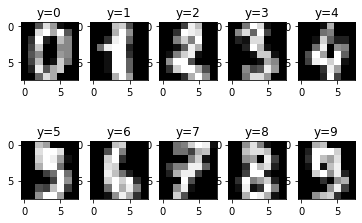

In [3]:
n = 10
n_cols = n // 2
fig, axs = plt.subplots(2, n_cols)

for i in range(n):
  row = i // n_cols
  col = i - row * n_cols
  axs[row, col].imshow(np.array(X[i]).reshape((8,8)), cmap='gray')
  axs[row, col].title.set_text('y='+str(y[i]))

X[0], y[0]

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.
```
  result = cross_val_score(estimator, X, y, cv=KFold(n_splits=10))
  result = cross_val_score(estimator, X, y, cv=10, n_jobs=-1)
  result.mean()
```

**[1]** Создайте *DecisionTreeClassifier* с настройками по умолчанию и измерьте качество его работы с помощью *cross_val_score*. Эта величина и будет ответом в пункте 1.

In [4]:
def n_cross_val_score(model, X, y, n=3, cv=10, n_jobs=-1):
  results = []
  for i in range(n): # для получения правильного ответа наверняка, см текст выше
    result = cross_val_score(model, X, y, cv=cv, n_jobs=n_jobs, )
    results.append(result.mean())
    print('Result{}:'.format(i), results[i])
  print('Median:', np.median(results))
  print()
  return np.median(results)

In [5]:
%%time
model = DecisionTreeClassifier()
ans_1 = n_cross_val_score(model, X, y)

Result0: 0.8330291744258224
Result1: 0.824130974549969
Result2: 0.8347020484171322
Median: 0.8330291744258224

CPU times: user 178 ms, sys: 53.2 ms, total: 231 ms
Wall time: 1.72 s


In [6]:
def write_answer(answer, n):
  with open('answer_{}.txt'.format(n), 'w') as f:
    f.write(str(answer))

write_answer(ans_1, 1)

result = cross_val_score(model, X, y, cv=10)
result, result.mean()

(array([0.82222222, 0.86111111, 0.83333333, 0.77777778, 0.79444444,
        0.89444444, 0.87777778, 0.81005587, 0.81564246, 0.79329609]),
 0.8280105524518933)

**Ради интереса визуализирую:**

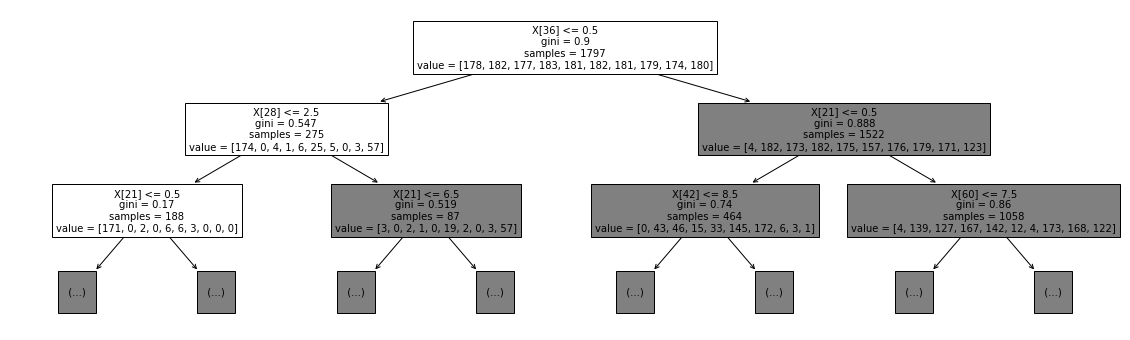

In [7]:
model.fit(X, y)
plt.figure(figsize=(20, 6))
plot_tree(model, max_depth=2, fontsize=10);

**[2]** Воспользуйтесь *BaggingClassifier* из *sklearn.ensemble*, чтобы обучить бэггинг над *DecisionTreeClassifier*. Используйте в *BaggingClassifier* параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [8]:
%%time
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
ans_2 = n_cross_val_score(model, X, y)
print('DecisionTree:' , ans_1)
print('Bagging:' , ans_2)
write_answer(ans_2, 2)

Result0: 0.9265052762259465
Result1: 0.9226163873370578
Result2: 0.9153879577901923
Median: 0.9226163873370578

DecisionTree: 0.8330291744258224
Bagging: 0.9226163873370578
CPU times: user 313 ms, sys: 45.2 ms, total: 358 ms
Wall time: 35.6 s


**[3]** Теперь изучите параметры *BaggingClassifier* и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [9]:
%%time 
d = X.shape[1]
sqrt_d = int(np.sqrt(d))
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, max_features=sqrt_d)
ans_3 = n_cross_val_score(model, X, y)
print('Bagging, max_features by default:' , ans_2)
write_answer(ans_3, 3)

Result0: 0.9315487274984481
Result1: 0.9310180012414648
Result2: 0.9326536312849161
Median: 0.9315487274984481

Bagging, max_features by default: 0.9226163873370578
CPU times: user 218 ms, sys: 28.1 ms, total: 246 ms
Wall time: 10.9 s


**[4]** Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в *BaggingClassifier* и добавить его в *DecisionTreeClassifier*. Какой параметр за это отвечает, можно понять из документации *sklearn*, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [10]:
%%time
tree = DecisionTreeClassifier(max_features=sqrt_d)
model = BaggingClassifier(base_estimator=tree, n_estimators=100)
ans_4 = n_cross_val_score(model, X, y)
print('Bagging, max_features=sqrt(d):' , ans_3)

write_answer(ans_4, 4)

Result0: 0.9465642458100557
Result1: 0.9471011793916821
Result2: 0.9493451272501551
Median: 0.9471011793916821

Bagging, max_features=sqrt(d): 0.9315487274984481
CPU times: user 238 ms, sys: 19.9 ms, total: 258 ms
Wall time: 11.7 s


**[5]** Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму *Random Forest*, поэтому почему бы не сравнить качество работы классификатора с *RandomForestClassifier* из *sklearn.ensemble*. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [11]:
%%time
model = RandomForestClassifier()
ans_4_2 = n_cross_val_score(model, X, y)
print('Manual Random Forest:' , ans_4)

Result0: 0.951024208566108
Result1: 0.9510273122284294
Result2: 0.9460117939168218
Median: 0.951024208566108

Manual Random Forest: 0.9471011793916821
CPU times: user 213 ms, sys: 25.9 ms, total: 239 ms
Wall time: 9.8 s


In [12]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

**2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев**

**3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.**

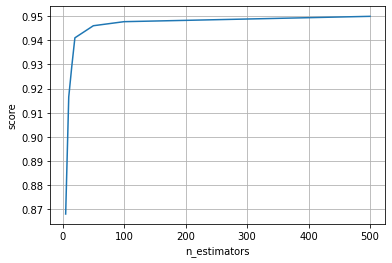

In [13]:
n_estimators_grid = [5, 10, 15, 20, 50, 100, 200, 500]
scoring = []
for n_estimators in n_estimators_grid:
  model = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators) #, max_features=64, max_depth=5)
  score = cross_val_score(model, X, y, cv=10, n_jobs=-1)
  scoring.append(score.mean())

plt.plot(n_estimators_grid, scoring)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.grid();

In [14]:
ans_5 = '2 3 '

**4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.**

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

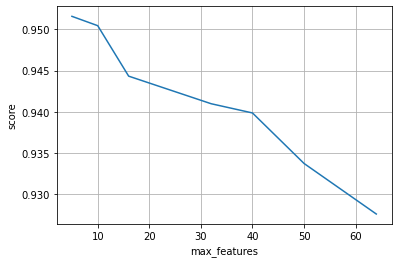

In [15]:
max_features_grid = [5, 10, 16, 32, 40, 50, 64]
scoring = []
for max_features in max_features_grid:
  model = RandomForestClassifier(n_jobs=-1, max_features=max_features) #, max_depth=5)
  score = cross_val_score(model, X, y, cv=10, n_jobs=-1)
  scoring.append(score.mean())

plt.plot(max_features_grid, scoring)
plt.xlabel('max_features')
plt.ylabel('score')
plt.grid();

In [16]:
ans_5 += '4 '

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

**7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).**

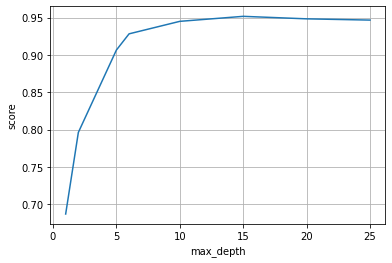

In [17]:
max_depth_grid = [1, 2, 5, 6, 10, 15, 20, 25]
scoring = []
for max_depth in max_depth_grid:
  model = RandomForestClassifier(n_jobs=-1, max_depth=max_depth)
  score = cross_val_score(model, X, y, cv=10, n_jobs=-1)
  scoring.append(score.mean())

plt.plot(max_depth_grid, scoring)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.grid();

In [18]:
ans_5 += '7'
write_answer(ans_5, 5)
print('Answer 5:', ans_5)

Answer 5: 2 3 4 7


Кросс-валидация на лучших параметрах по графикам

In [19]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_features=10, max_depth=15)
n_cross_val_score(model, X, y);

Result0: 0.9482371198013656
Result1: 0.9482340161390439
Result2: 0.948792675356921
Median: 0.9482371198013656

